In [76]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s

## Import data

In [77]:
data = pd.read_csv("mobility_data_with_names.csv", delimiter=',', index_col='ID') # import dataset
data = data[['Populatie', 'Vervoerwijzen', 'KenmerkenVerplaatsing', 'RegioS', 'Perioden', 'Afstand_2']] # filter only the necessary columns
population_total = data[data['Populatie'].isin([10000])] # filter data on total population (excluding only the population aged 12 and older)
car_and_train = population_total[population_total['Vervoerwijzen'].isin(['Auto (passagier)', 'Auto (bestuurder)', 'Trein', 'Totaal'])] # filter modes of transportation by car, train and total
car_and_train_total = car_and_train[car_and_train['KenmerkenVerplaatsing'].isin(['Totaal'])] # filter characteristics of movement by total

## Total kilometers per province per year

In [78]:
total_kilometers = car_and_train_total[car_and_train_total['Vervoerwijzen'].isin(['Totaal'])] # filter modes of transportation to only the total number of kilometers
tot_km_province = total_kilometers[total_kilometers['RegioS'].isin(['Groningen (PV)',         # filter regios to only total kilometer per provinces
                                                                    'Friesland (PV)', 
                                                                    'Drenthe (PV)', 
                                                                    'Overijssel (PV)', 
                                                                    'Flevoland (PV)', 
                                                                    'Gelderland (PV)', 
                                                                    'Utrecht (PV)', 
                                                                    'Noord-Holland (PV)', 
                                                                    'Zuid-Holland (PV)', 
                                                                    'Zeeland (PV)', 
                                                                    'Noord-Brabant (PV)', 
                                                                    'Limburg (PV)'])]


C:\Users\liset\AppData\Local\Temp\ipykernel_47552\2456800370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tot_km_province['Datum'] = (
C:\Users\liset\AppData\Local\Temp\ipykernel_47552\2456800370.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tot_km_province['Datum'] = pd.to_datetime(tot_km_province['Datum'])


,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Afstand_2,Dag,Maand
Datum,,,,,,,,
2010-01-01,10000,Totaal,Totaal,Limburg (PV),2010,28.18,1,1
2011-01-01,10000,Totaal,Totaal,Limburg (PV),2011,28.54,1,1
2012-01-01,10000,Totaal,Totaal,Limburg (PV),2012,25.17,1,1
2013-01-01,10000,Totaal,Totaal,Limburg (PV),2013,28.87,1,1
2014-01-01,10000,Totaal,Totaal,Limburg (PV),2014,26.34,1,1
2015-01-01,10000,Totaal,Totaal,Limburg (PV),2015,26.97,1,1
2016-01-01,10000,Totaal,Totaal,Limburg (PV),2016,26.06,1,1
2017-01-01,10000,Totaal,Totaal,Limburg (PV),2017,28.69,1,1


,Groningen,Friesland,Drenthe,Overijssel,Flevoland,Gelderland,Utrecht,Noord-Holland,Zuid-Holland,Zeeland,Noord-Brabant,Limburg
Datum,,,,,,,,,,,,
2010-01-01,35.75,32.36,35.66,30.38,38.05,33.11,30.60,28.74,27.34,32.72,30.28,28.18
2011-01-01,35.85,30.31,34.90,31.25,35.32,31.69,30.40,30.63,27.86,31.80,32.01,28.54
2012-01-01,33.01,30.98,32.65,29.47,35.92,28.82,32.80,27.81,28.00,32.88,30.23,25.17
2013-01-01,31.84,32.99,36.36,29.98,32.94,31.12,33.27,28.91,27.69,33.65,32.33,28.87
2014-01-01,32.12,33.95,35.77,30.87,35.75,32.98,34.31,29.16,28.22,30.87,31.38,26.34
2015-01-01,32.39,31.65,35.38,28.19,38.76,31.47,31.20,27.83,27.29,28.17,29.88,26.97
2016-01-01,32.00,32.47,35.60,28.41,34.85,32.17,30.67,27.36,27.75,29.84,29.44,26.06
2017-01-01,32.19,28.84,32.15,30.28,37.03,30.26,31.07,27.40,27.02,28.68,29.29,28.69


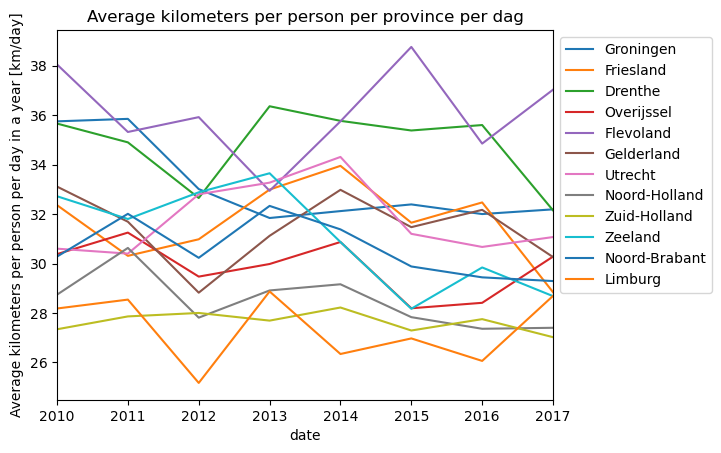

In [86]:
# Assign a date to the data based on the year
tot_km_province.loc[:, 'Dag'] = 1
tot_km_province.loc[:, 'Maand'] = 1

tot_km_province['Datum'] = (
    tot_km_province['Perioden'].astype(str) + '-' +
    tot_km_province['Maand'].astype(str).str.zfill(2) + '-' +
    tot_km_province['Dag'].astype(str).str.zfill(2)
)
tot_km_province['Datum'] = pd.to_datetime(tot_km_province['Datum'])
tot_km_province.set_index('Datum', inplace=True)

# Create a dataset for each province
groningen = tot_km_province[tot_km_province['RegioS'] == 'Groningen (PV)']
friesland = tot_km_province[tot_km_province['RegioS'] == 'Friesland (PV)']
drenthe = tot_km_province[tot_km_province['RegioS'] == 'Drenthe (PV)']
overijssel = tot_km_province[tot_km_province['RegioS'] == 'Overijssel (PV)']
flevoland = tot_km_province[tot_km_province['RegioS'] == 'Flevoland (PV)']
gelderland = tot_km_province[tot_km_province['RegioS'] == 'Gelderland (PV)']
utrecht = tot_km_province[tot_km_province['RegioS'] == 'Utrecht (PV)']
noord_holland= tot_km_province[tot_km_province['RegioS'] == 'Noord-Holland (PV)']
zuid_holland = tot_km_province[tot_km_province['RegioS'] == 'Zuid-Holland (PV)']
zeeland = tot_km_province[tot_km_province['RegioS'] == 'Zeeland (PV)']
noord_brabant = tot_km_province[tot_km_province['RegioS'] == 'Noord-Brabant (PV)']
limburg = tot_km_province[tot_km_province['RegioS'] == 'Limburg (PV)']

# Combine the datasets per province to one dataset
totaal_per_province = groningen[['Afstand_2']].copy()
totaal_per_province.rename(columns={'Afstand_2': 'Groningen'}, inplace=True)
totaal_per_province['Friesland'] = friesland[['Afstand_2']]
totaal_per_province['Drenthe'] = drenthe[['Afstand_2']]
totaal_per_province['Overijssel'] = overijssel[['Afstand_2']]
totaal_per_province['Flevoland'] = flevoland[['Afstand_2']]
totaal_per_province['Gelderland'] = gelderland[['Afstand_2']]
totaal_per_province['Utrecht'] = utrecht[['Afstand_2']]
totaal_per_province['Noord-Holland'] = noord_holland[['Afstand_2']]
totaal_per_province['Zuid-Holland'] = zuid_holland[['Afstand_2']]
totaal_per_province['Zeeland'] = zeeland[['Afstand_2']]
totaal_per_province['Noord-Brabant'] = noord_brabant[['Afstand_2']]
totaal_per_province['Limburg'] = limburg[['Afstand_2']]

# Plot the data
display(totaal_per_province)
totaal_per_province.plot()
plt.title('Average kilometers per person per province per dag')
plt.xlabel('date')
plt.ylabel('Average kilometers per person per day in a year [km/day]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Kilometer per year per mode of transportation per Province

In [80]:
total_province = car_and_train_total[car_and_train_total['RegioS'].isin(['Groningen (PV)', 
                                                                         'Friesland (PV)', 
                                                                         'Drenthe (PV)', 
                                                                         'Overijssel (PV)',
                                                                         'Flevoland (PV)',
                                                                         'Gelderland (PV)',
                                                                         'Utrecht (PV)',
                                                                         'Noord-Holland (PV)',
                                                                         'Zuid-Holland (PV)',
                                                                         'Zeeland (PV)',
                                                                         'Noord-Brabant (PV)',
                                                                         'Limburg (PV)'])]
# display(total_province)

In [81]:
total_province.loc[:, 'Dag'] = 1
total_province.loc[:, 'Maand'] = 1

total_province['Datum'] = (
    total_province['Perioden'].astype(str) + '-' +
    total_province['Maand'].astype(str).str.zfill(2) + '-' +
    total_province['Dag'].astype(str).str.zfill(2)
)
total_province['Datum'] = pd.to_datetime(total_province['Datum'])
total_province.set_index('Datum', inplace=True)
# display(total_province)

C:\Users\liset\AppData\Local\Temp\ipykernel_47552\3289186140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_province.loc[:, 'Dag'] = 1
C:\Users\liset\AppData\Local\Temp\ipykernel_47552\3289186140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_province.loc[:, 'Maand'] = 1
C:\Users\liset\AppData\Local\Temp\ipykernel_47552\3289186140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

<Figure size 640x480 with 0 Axes>

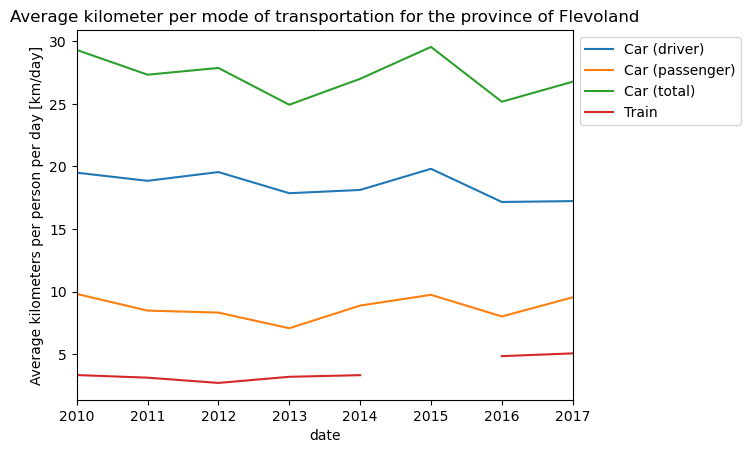

<Figure size 640x480 with 0 Axes>

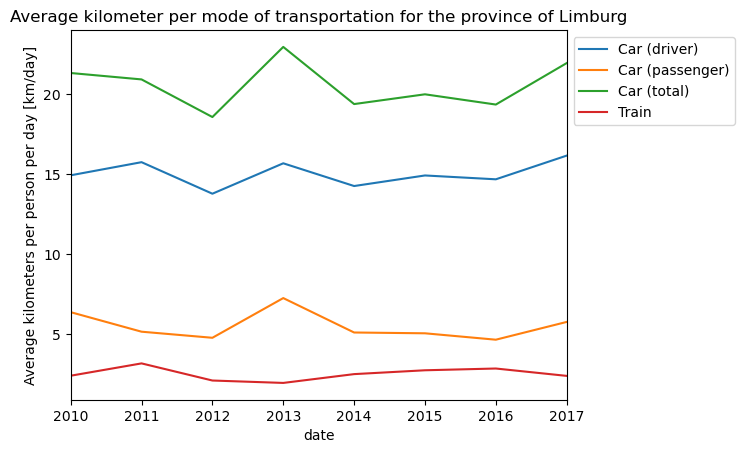

In [82]:
provinces = total_province['RegioS'].unique()      # filtering the difference names of the provinces in the dataset
data_per_province = {}

for province in provinces:                          # loop trough the difference provinces and shorting the data in the dataset
    car_and_train_province = total_province[total_province['RegioS'] == province]
    
    car_bestuurder = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (bestuurder)']
    car_passagier = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (passagier)']
    trein = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Trein']
    
    car_bestuurder.sort_index(inplace=True)
    car_passagier.sort_index(inplace=True)
    trein.sort_index(inplace=True)
    
    data_province = car_bestuurder[['Afstand_2']].copy()
    data_province.rename(columns={'Afstand_2': 'Car (driver)'}, inplace=True)
    data_province['Car (passenger)'] = car_passagier[['Afstand_2']]
    data_province['Car (total)'] = data_province['Car (driver)'] + data_province['Car (passenger)']
    data_province['Train'] = trein[['Afstand_2']]
    
    data_per_province[province] = data_province


# Plot the data
plt.figure()
data_per_province['Flevoland (PV)'].plot()
plt.title('Average kilometer per mode of transportation for the province of Flevoland')
plt.xlabel('date')
plt.ylabel('Average kilometers per person per day [km/day]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure()
data_per_province['Limburg (PV)'].plot()
plt.title('Average kilometer per mode of transportation for the province of Limburg')
plt.xlabel('date')
plt.ylabel('Average kilometers per person per day [km/day]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

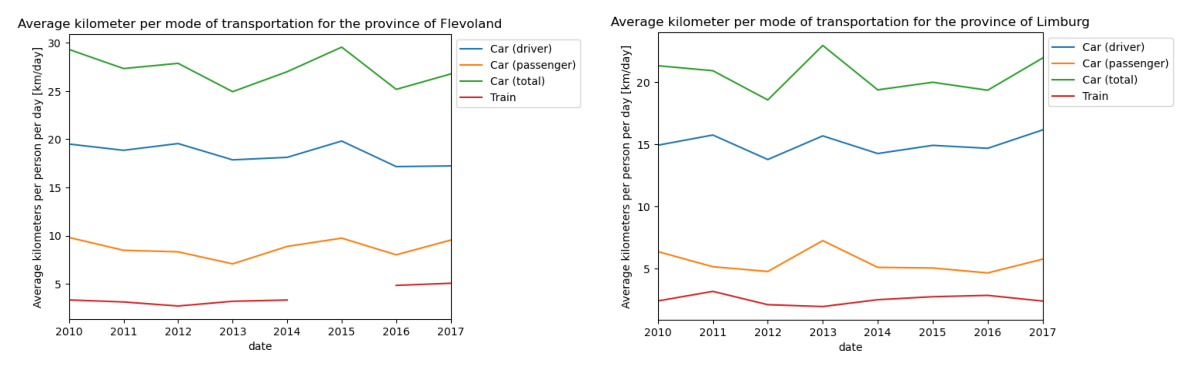

In [83]:
import matplotlib.image as mpimg

image1 = mpimg.imread('Average_kilometer_per_mode_of_transportation_Flevoland.png')
image2 = mpimg.imread('Average_kilometer_per_mode_of_transportation_Limburg.png')

# Maak de figuur aan
plt.figure(figsize=(12, 6))

# Eerste subplot voor afbeelding 1
plt.subplot(1, 2, 1)  # 1 rij, 2 kolommen, eerste subplot
plt.imshow(image1)
plt.axis('off')  # Schakel de assen uit voor een strakkere weergave

# Tweede subplot voor afbeelding 2
plt.subplot(1, 2, 2)  # 1 rij, 2 kolommen, tweede subplot
plt.imshow(image2)
plt.axis('off')

# Toon de figuur
plt.tight_layout()  # Zorgt ervoor dat de subplots netjes naast elkaar staan
plt.show()

In [84]:
# import fuel data
prijzen = pd.read_csv('fuel_prices.csv', delimiter = ';', index_col = 'Perioden', parse_dates = ['Perioden'])

# get yearly average
prijsjaar = prijzen.resample('y', kind = 'period').mean()

# select only data from 2010 to 2017
prijsjaar1017 = prijsjaar.loc['2010':'2017']
benzinejaar1017 = prijsjaar.loc['2010':'2017', 'BenzineEuro95_1']
dieseljaar1017 = prijsjaar.loc['2010':'2017', 'Diesel_2']

# determine average fuel price
gemjaar1017 = (benzinejaar1017 + dieseljaar1017) / 2

# take out data for 2015 to match data points with train data for Flevoland
gemjaar1017_15 = gemjaar1017.drop(['2015'], axis=0)


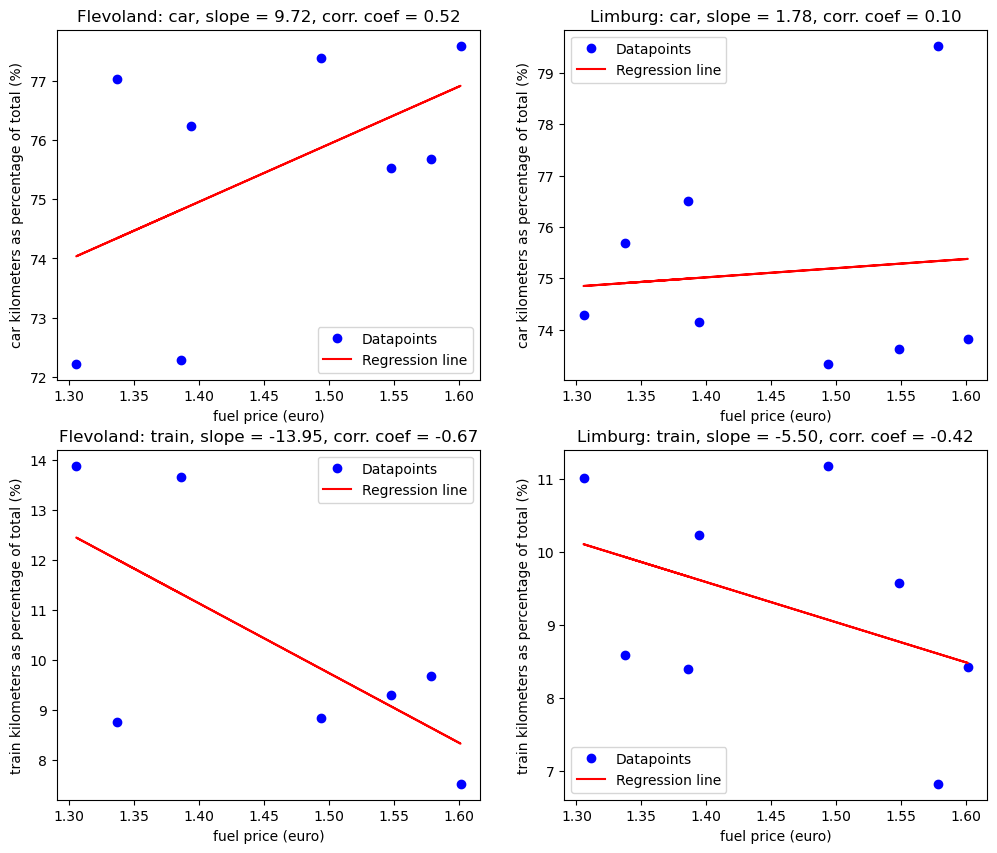

In [100]:
# prepare province data
flev = data_per_province['Flevoland (PV)']
flev['car'] = flev['Car (total)'] / totaal_per_province.Flevoland * 100
flev['train'] = flev['Train'] / totaal_per_province.Flevoland * 100
flevcar = flev.car
flevtrain = flev['train'].dropna() #remove NaN value for 2015

lim = data_per_province['Limburg (PV)']
lim['car'] = lim['Car (total)'] / totaal_per_province.Limburg * 100
lim['train'] = lim['Train'] / totaal_per_province.Limburg * 100
limcar = lim.car
limtrain = lim.train

# perform linear regression on data
fcar = s.linregress(gemjaar1017, flevcar)
ftrain = s.linregress(gemjaar1017_15, flevtrain)
lcar = s.linregress(gemjaar1017, limcar)
ltrain = s.linregress(gemjaar1017, limtrain)

# calculate correlation coefficients
cfcar = s.pearsonr(gemjaar1017, flevcar).statistic
cftrain = s.pearsonr(gemjaar1017_15, flevtrain).statistic
clcar = s.pearsonr(gemjaar1017, limcar).statistic
cltrain = s.pearsonr(gemjaar1017, limtrain).statistic

#plot data points and regression line
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0,0].plot(gemjaar1017.values, flevcar, 'bo', label = 'Datapoints')
ax[0,0].plot(gemjaar1017.values, gemjaar1017.values * fcar.slope + fcar.intercept, 'r', label = 'Regression line')
ax[0,0].title.set_text(f'Flevoland: car, slope = {fcar.slope:.2f}, corr. coef = {cfcar:.2f}')
ax[0,0].set_xlabel('fuel price (euro)')
ax[0,0].set_ylabel('car kilometers as percentage of total (%)')
ax[0,0].legend()

ax[1,0].plot(gemjaar1017_15.values, flevtrain, 'bo', label = 'Datapoints')
ax[1,0].plot(gemjaar1017_15.values, gemjaar1017_15.values * ftrain.slope + ftrain.intercept, 'r', label = 'Regression line')
ax[1,0].title.set_text(f'Flevoland: train, slope = {ftrain.slope:.2f}, corr. coef = {cftrain:.2f}')
ax[1,0].set_xlabel('fuel price (euro)')
ax[1,0].set_ylabel('train kilometers as percentage of total (%)')
ax[1,0].legend()

ax[0,1].plot(gemjaar1017.values, limcar, 'bo', label = 'Datapoints')
ax[0,1].plot(gemjaar1017.values, gemjaar1017.values * lcar.slope + lcar.intercept, 'r', label = 'Regression line')
ax[0,1].title.set_text(f'Limburg: car, slope = {lcar.slope:.2f}, corr. coef = {clcar:.2f}')
ax[0,1].set_xlabel('fuel price (euro)')
ax[0,1].set_ylabel('car kilometers as percentage of total (%)')
ax[0,1].legend()

ax[1,1].plot(gemjaar1017.values, limtrain, 'bo', label = 'Datapoints')
ax[1,1].plot(gemjaar1017.values, gemjaar1017.values * ltrain.slope + ltrain.intercept, 'r', label = 'Regression line')
ax[1,1].title.set_text(f'Limburg: train, slope = {ltrain.slope:.2f}, corr. coef = {cltrain:.2f}')
ax[1,1].set_xlabel('fuel price (euro)')
ax[1,1].set_ylabel('train kilometers as percentage of total (%)')
ax[1,1].legend();